# Web page phishing detection using machine learning !


* Importing the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

* Importing dataset CSV file

In [2]:
# a function that takes input csv file path and returns X and Y
#load dataframe

def load_data(file_path):
    df = pd.read_csv(file_path)
    return df


In [3]:
df = load_data('data/dataset_phishing.csv')
df.head()



,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [5]:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [6]:
df.shape

(11430, 89)

In [7]:
#drop duplicates
df = df.drop_duplicates()
df.shape
#no duplicates found

(11430, 89)

In [8]:
#drop nulls
df =df.dropna()
df.shape

(11430, 89)

In [9]:
#check for nulls
df.isnull().sum()


url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

So there is no null value in the dataset.

<Figure size 432x288 with 0 Axes>

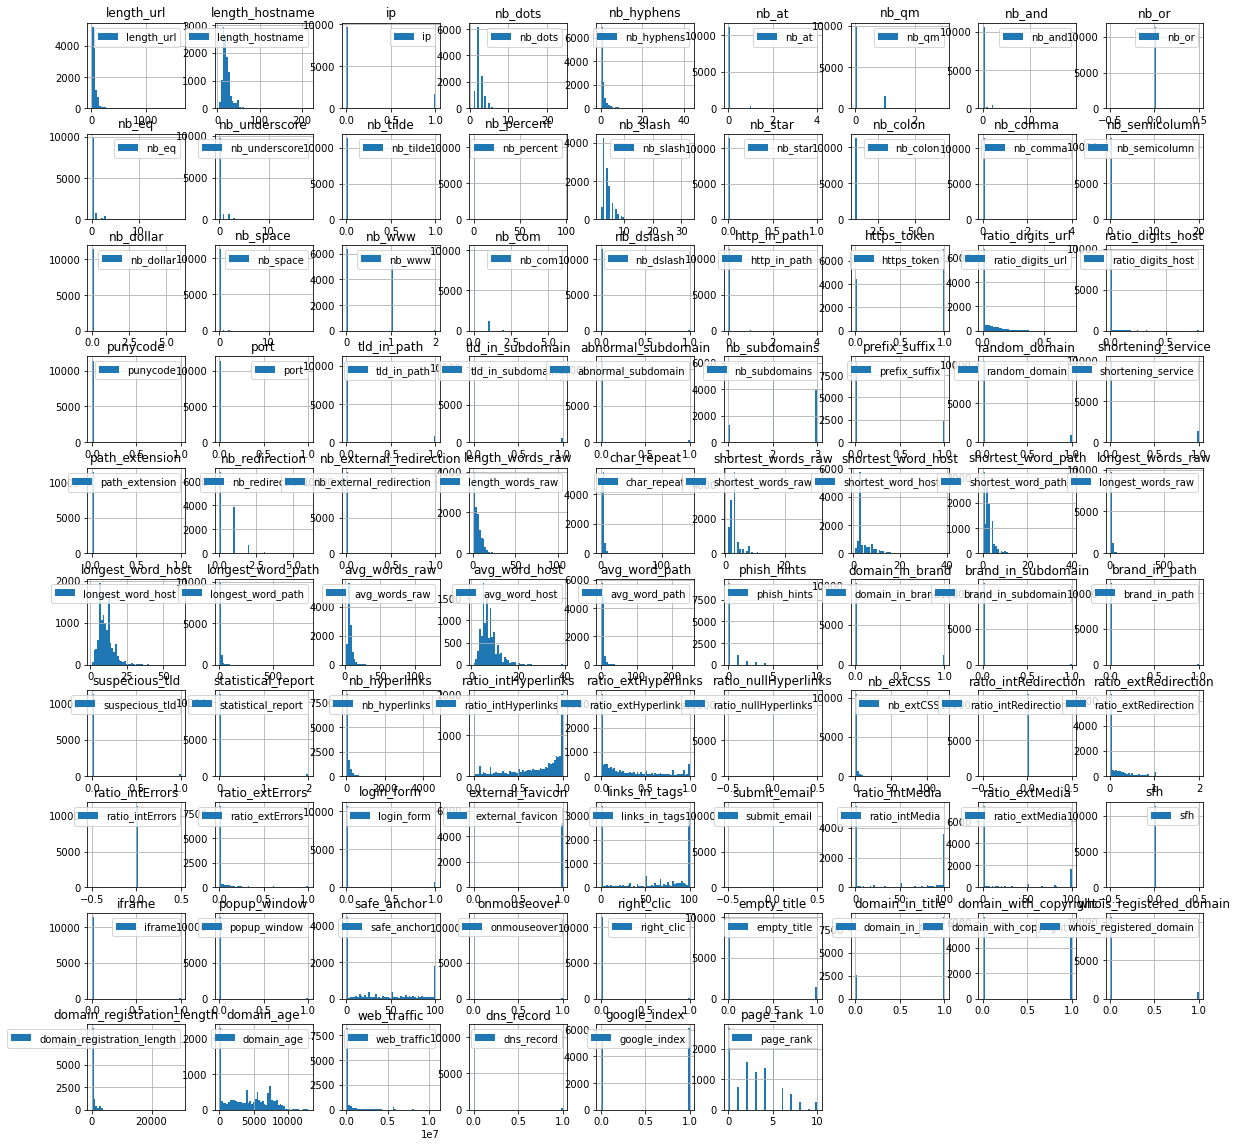

In [10]:
# #data visualization
# #add space between the subplots
plt.subplots_adjust(wspace = 0.8, hspace = 0.8)
#space between axes and title
# plt.tight_layout()
#plot histograms of the data
rand_colors_list = []
df.hist(bins=50, figsize=(20,20), legend=True)
plt.show()


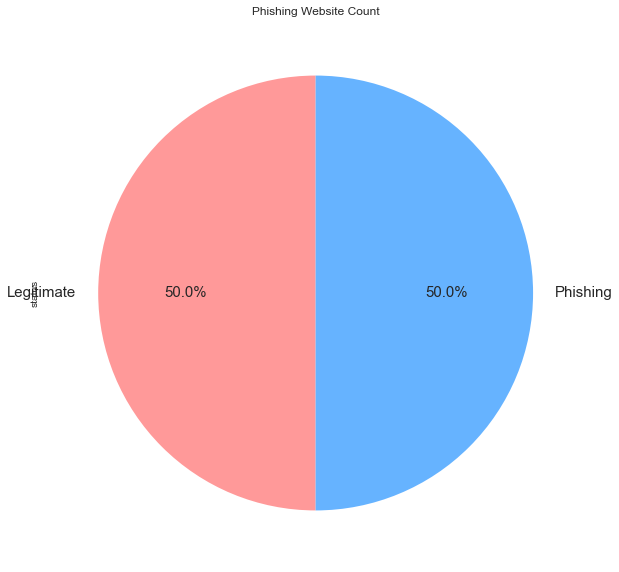

In [11]:
# Now we visualize the output variable
#pie chart
#white background
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,10))
df['status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90,  colors=['#ff9999','#66b3ff'], labels=['Legitimate', 'Phishing'], fontsize=15)
plt.title('Phishing Website Count')
plt.show()


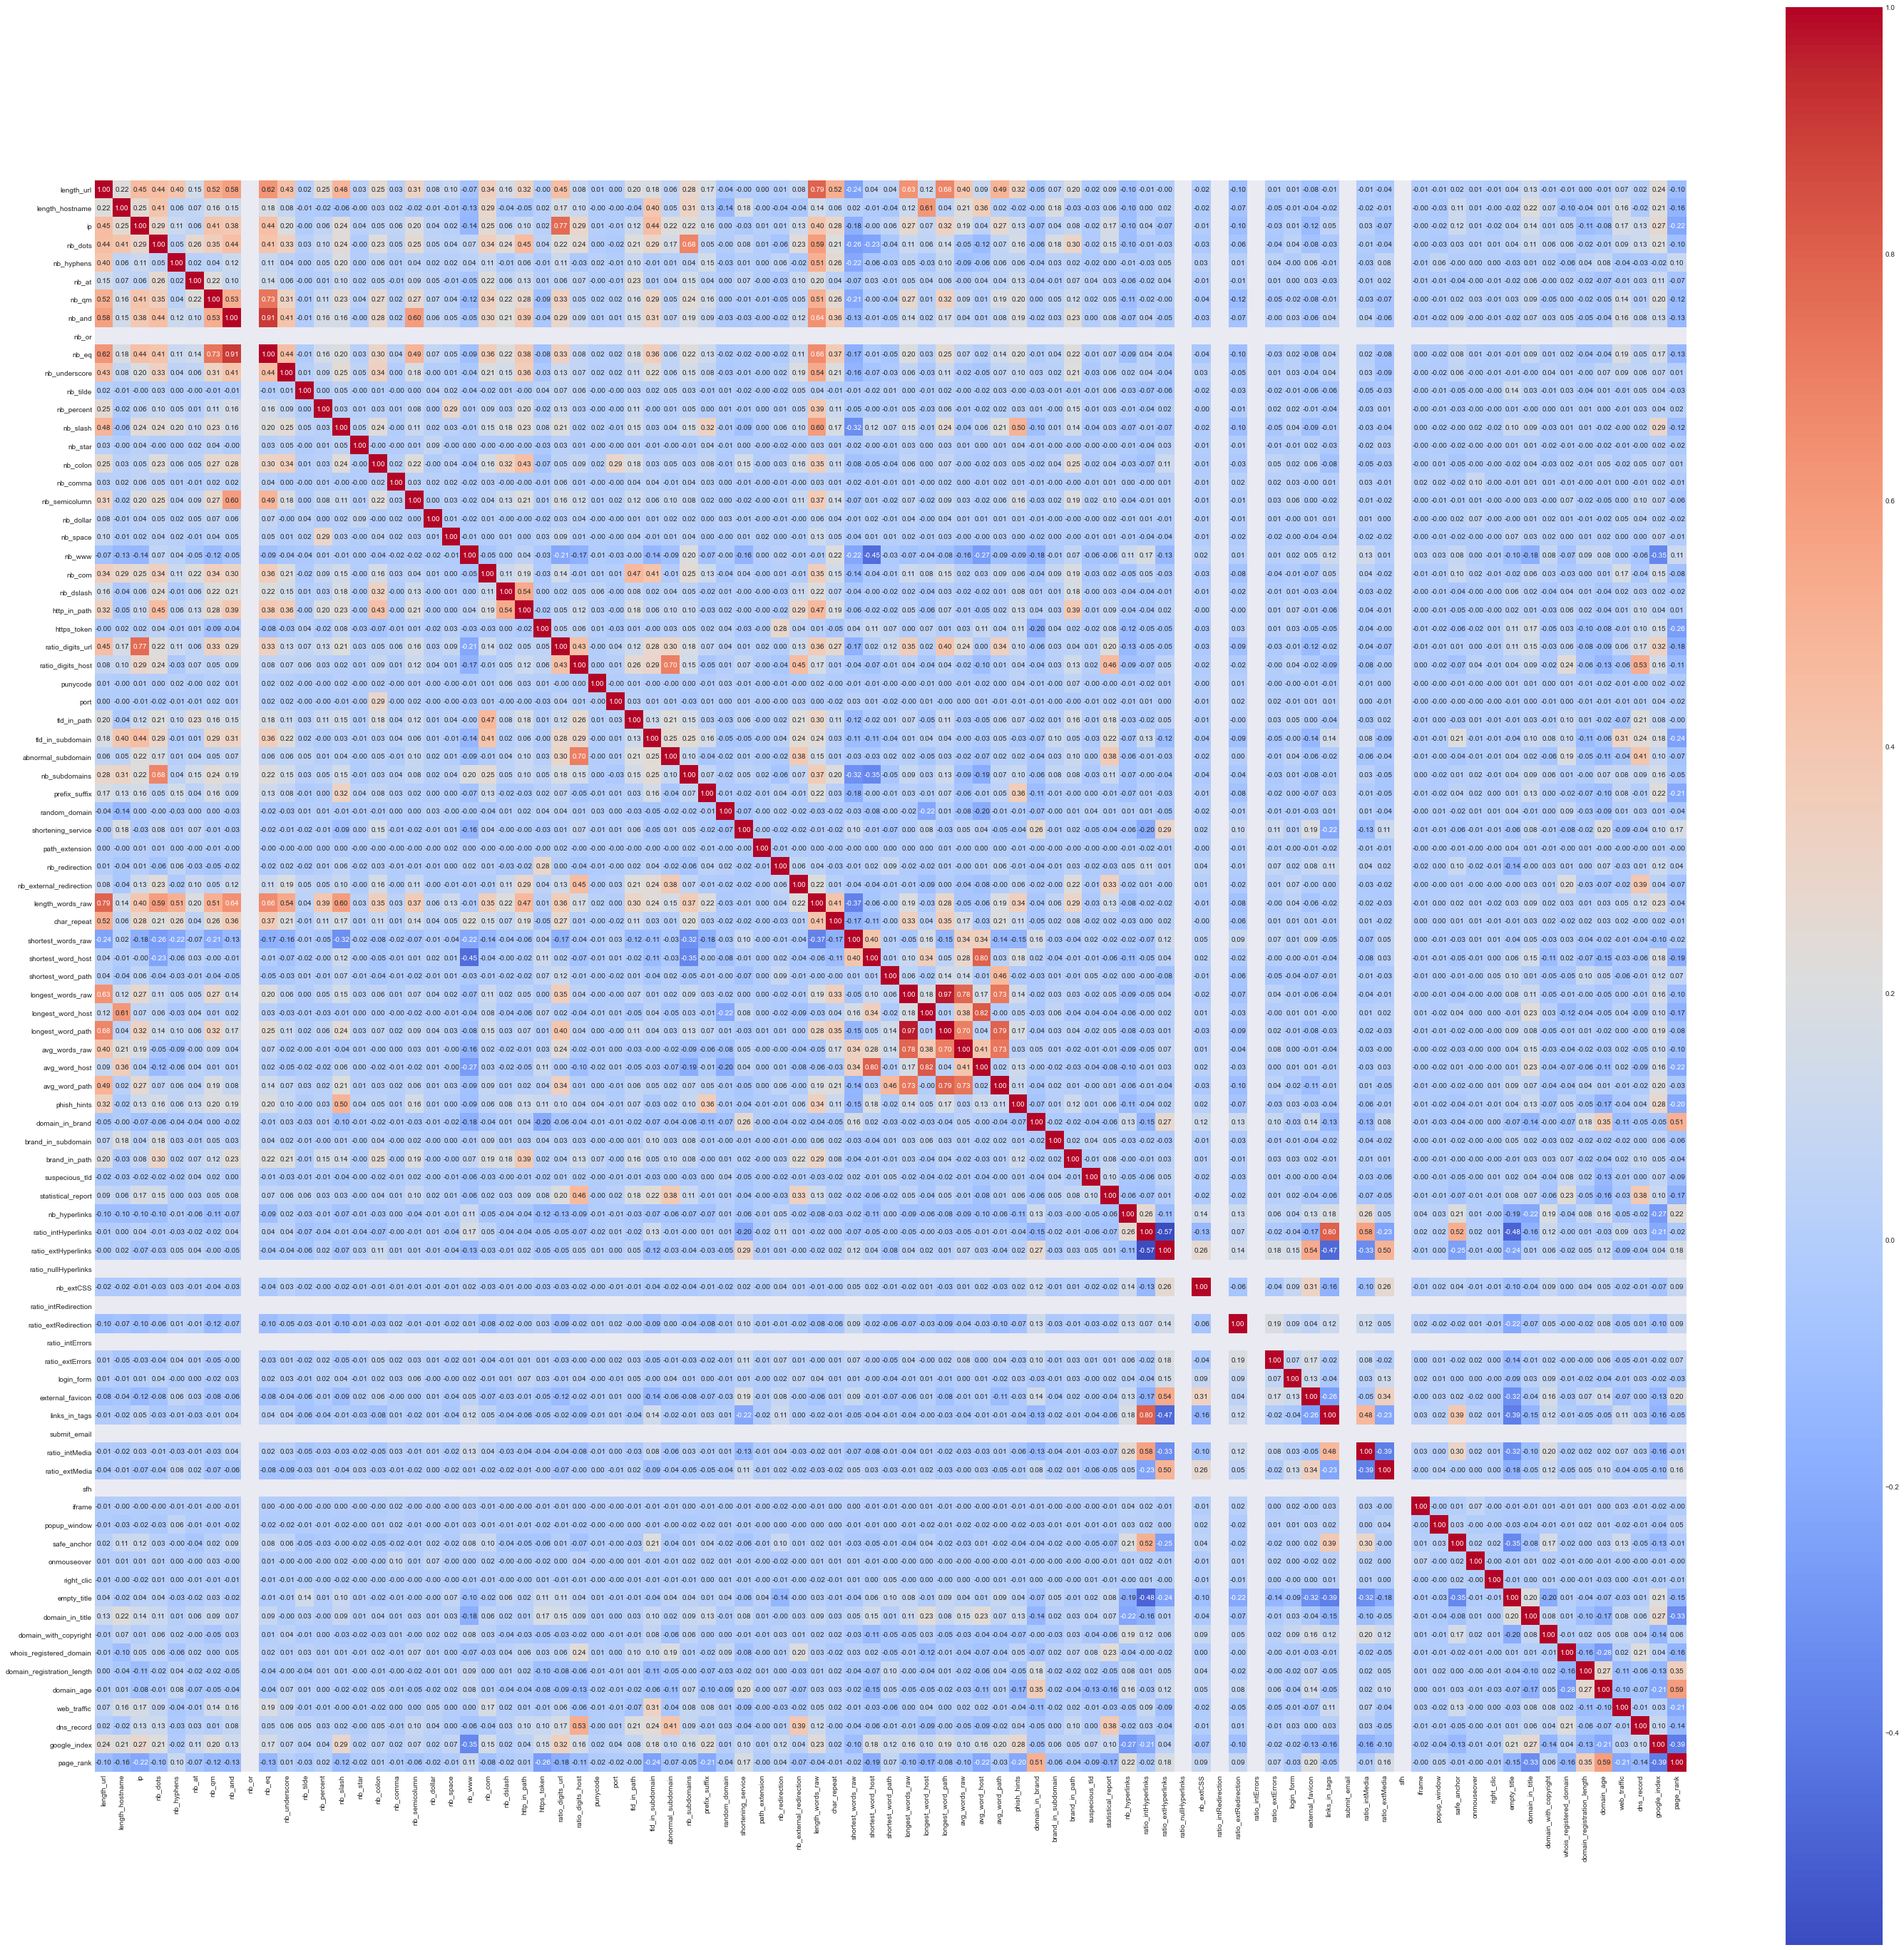

In [12]:
# #corr matrix
corr_matrix = df.corr()
# #heatmap

plt.figure(figsize=(50,50))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True , square=True, fmt='.2f')
plt.show()

In [13]:
# Check some random samples
random_samples = df.sample(5)
# expand the output to see all columns
pd.set_option('display.max_columns', None)
random_samples



,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
8188,http://forum.ethereum.org/discussion/2165/clou...,78,18,0,2,6,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.064103,0.000000,0,0,0,0,0,2,0,0,0,0,1,0,11,1,3,5,3,10,8,10,5.181818,6.500000,4.888889,0,0,0,0,0,0,219,0.908676,0.091324,0,0,0,0.050000,0,0.050000,0,1,97.435897,0,61.290323,38.709677,0,0,0,86.842105,0,0,0,0,0,0,124,2432,14720,0,0,5,legitimate
4448,http://login-outlook-office365.el.r.appspot.co...,58,40,0,4,3,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,1,0.051724,0.075000,0,0,0,0,0,3,0,0,1,0,0,0,8,3,1,1,2,9,9,7,5.000000,5.166667,4.500000,3,0,0,0,0,0,22,0.181818,0.818182,0,1,0,0.166667,0,0.000000,0,1,0.000000,0,16.666667,83.333333,0,0,0,25.000000,0,0,0,1,1,0,228,5615,0,0,1,5,phishing
7795,https://myjobsearch.com/careers/bodyguard.html,46,15,0,2,0,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,0,0,4,1,4,11,4,11,11,9,7.750000,11.000000,6.666667,0,0,0,0,0,0,42,0.880952,0.119048,0,0,0,0.200000,0,0.400000,0,0,80.000000,0,100.000000,0.000000,0,0,0,71.428571,0,0,0,1,1,0,299,-1,218745,0,0,4,legitimate
10378,http://www.madmoizelle.com/,27,19,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,1,0,2,4,3,3,0,11,11,0,7.000000,7.000000,0.000000,0,0,0,0,0,0,158,0.607595,0.392405,0,3,0,0.177419,0,0.016129,0,1,41.666667,0,0.000000,100.000000,0,0,0,6.666667,0,0,0,0,0,0,257,5586,50384,0,0,6,legitimate
6778,https://wwwcentrynetl76.webcindario.com/CENTUR...,167,31,0,3,1,0,1,2,0,3,4,0,0,8,0,1,0,0,0,0,1,0,0,0,0,0.011976,0.064516,0,0,0,0,0,3,1,0,0,0,0,0,19,66,2,11,2,18,15,18,7.157895,13.000000,6.470588,0,0,0,0,0,0,1,0.000000,1.000000,0,0,0,0.000000,0,0.000000,0,0,0.000000,0,0.000000,100.000000,0,0,0,0.000000,0,0,1,1,0,0,948,7087,18105,0,1,3,phishing


In [14]:
#check for class count
df['status'].value_counts()


phishing      5715
legitimate    5715
Name: status, dtype: int64

so we have balanced dataset.

In [15]:
#checking for outliers
#boxplot
plt.figure(figsize=(200,100))
df.boxplot()
#zoom in
#name the plot : after scaling
plt.title('Before Scaling')
#add legend with labels
plt.show()


Some important notes from the box plot are:
1. The feature : "web_traffic" has a lot of outliers.=> to solve this we can use log transformation.
2. Features ranges are different.=> to solve this we can use standardization.

Also , looks like the features needs scaling.
:)


## Data Preprocessing

In [16]:
# data preprocessing
#1. We have to convert the categorical data into numerical data

# category = df.select_dtypes(include=['object']).columns
## the only categorical data is the class column and the url column
# we will convert the class column to numerical data
#by mapping the values : 1 for phishing and 0 for legitimate
df['status'] = df['status'].map({'phishing': 1, 'legitimate': 0})
print(df['status'].value_counts())
df['status'].head()


0    5715
1    5715
Name: status, dtype: int64


0    0
1    1
2    1
3    0
4    0
Name: status, dtype: int64

<AxesSubplot:title={'center':'Correlation with Phishing'}>

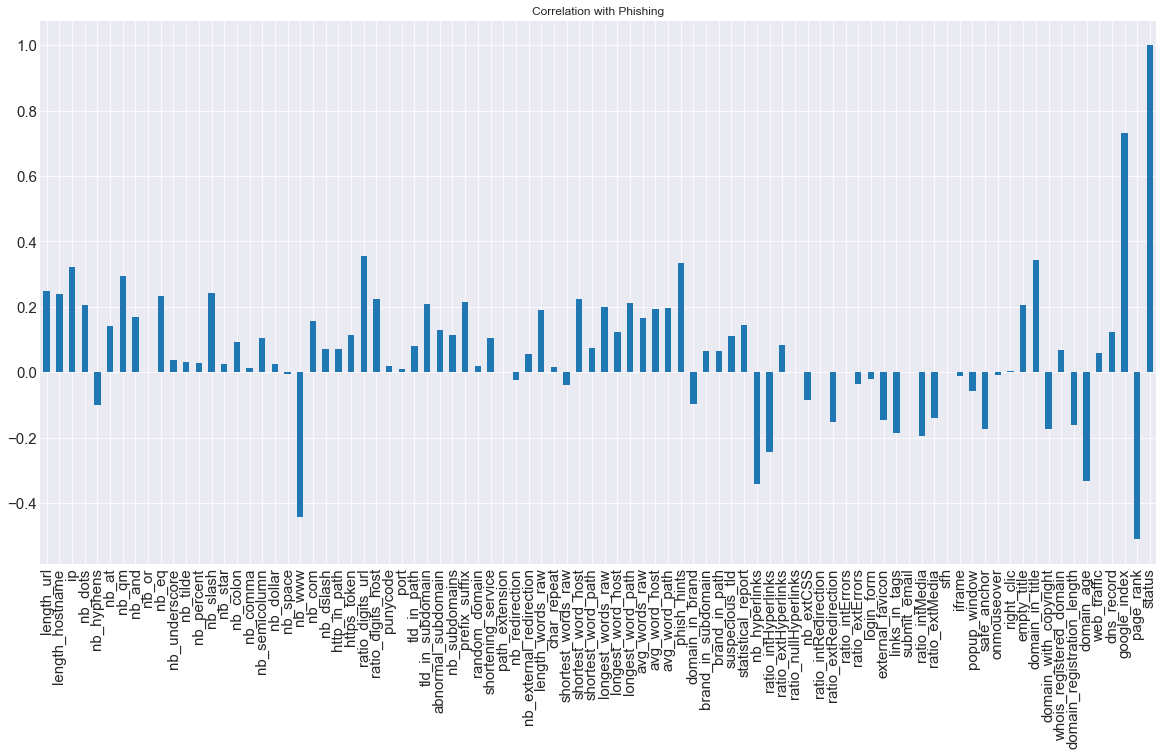

In [17]:
#get the correlation of the features with the output variable
# df.drop('status', axis=1).apply(lambda x: x.corr(df.status))
coor_with_output =df.corrwith(df['status'])
coor_with_output.plot.bar(
        figsize = (20, 10), title = "Correlation with Phishing", fontsize = 15,
        grid = True)


## 🔍Experimenting with/without eliminating low correlated features

### Comment the following **2 cells** to experiment withou eliminating low correlated features
### and uncomment for eliminating low correlated features

In [18]:
#drop the features that have a correlation of less than 0.1
print("df shape before dropping low correlation features", df.shape)
# get the features with low correlation between -0.1 and 0.1
low_corr = coor_with_output[coor_with_output < 0.1]
low_corr = low_corr[low_corr > -0.1]
print(f"Features with low correlation with the output variable: {low_corr.index}")
df = df.drop(columns=low_corr.index)
print("df shape after dropping low correlation features", df.shape)

df shape before dropping low correlation features (11430, 89)
Features with low correlation with the output variable: Index(['nb_underscore', 'nb_tilde', 'nb_percent', 'nb_star', 'nb_colon',
       'nb_comma', 'nb_dollar', 'nb_space', 'nb_dslash', 'http_in_path',
       'punycode', 'port', 'tld_in_path', 'random_domain', 'path_extension',
       'nb_redirection', 'nb_external_redirection', 'char_repeat',
       'shortest_words_raw', 'shortest_word_path', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'ratio_extHyperlinks',
       'nb_extCSS', 'ratio_extErrors', 'login_form', 'iframe', 'popup_window',
       'onmouseover', 'right_clic', 'whois_registered_domain', 'web_traffic'],
      dtype='object')
df shape after dropping low correlation features (11430, 56)


Top 5 features with the highest correlation with the output variable
status              1.000000
google_index        0.731171
page_rank           0.511137
nb_www              0.443468
ratio_digits_url    0.356395
domain_in_title     0.342807
dtype: float64


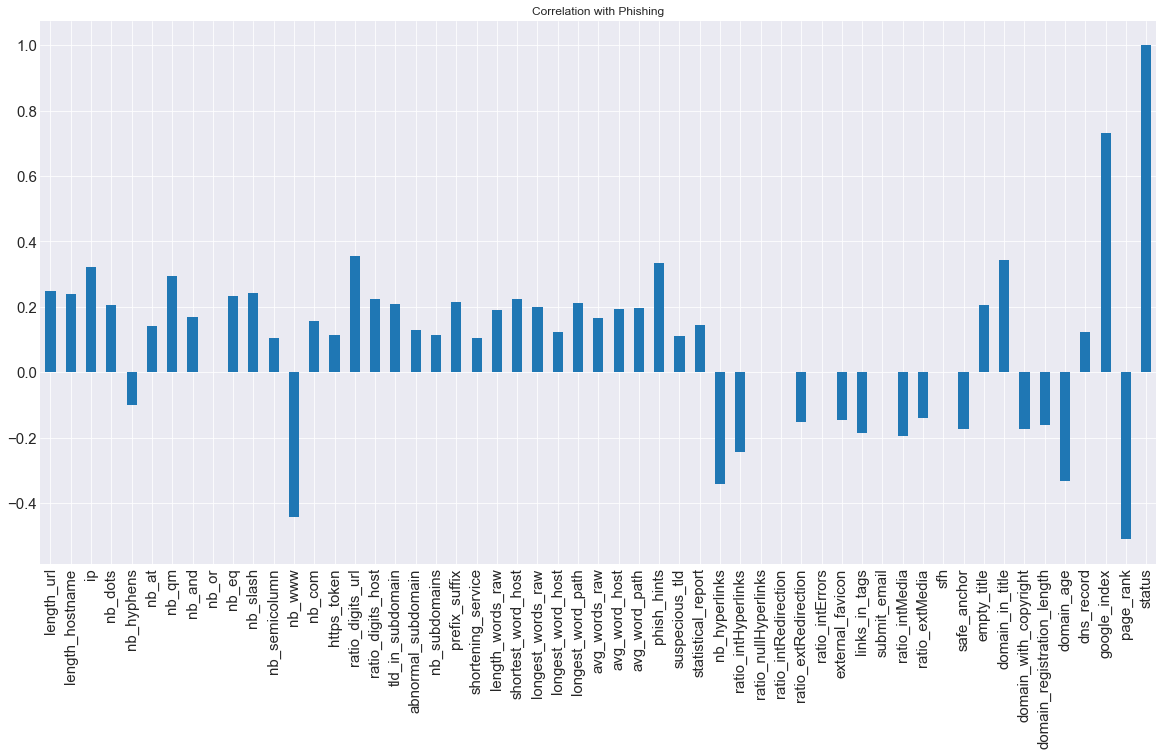

In [21]:
#get the correlation of the features with the output variable
# df.drop('status', axis=1).apply(lambda x: x.corr(df.status))
coor_with_output =df.corrwith(df['status'])
coor_with_output.plot.bar(
        figsize = (20, 10), title = "Correlation with Phishing", fontsize = 15,
        grid = True)
#top 5 features with the highest correlation with the output variable
print("Top 5 features with the highest correlation with the output variable")
print(coor_with_output.abs().sort_values(ascending=False).head(6))


In [22]:
#the url column is not useful for the model so we will drop it
df = df.drop('url', axis=1)
df.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_slash,nb_semicolumn,nb_www,nb_com,https_token,ratio_digits_url,ratio_digits_host,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,shortening_service,length_words_raw,shortest_word_host,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_nullHyperlinks,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,safe_anchor,empty_title,domain_in_title,domain_with_copyright,domain_registration_length,domain_age,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,3,0,1,0,1,0.000000,0.0,0,0,3,0,0,4,3,11,11,6,5.750000,7.0,4.500000,0,0,0,17,0.529412,0,0,0.875000,0,0,80.000000,0,100.000000,0.000000,0,0.0,0,0,1,45,-1,1,1,4,0
1,77,23,1,1,0,0,0,0,0,0,5,0,0,0,1,0.220779,0.0,0,0,1,0,0,4,19,32,19,32,15.750000,19.0,14.666667,0,0,0,30,0.966667,0,0,0.000000,0,0,100.000000,0,80.000000,20.000000,0,100.0,0,1,0,77,5767,0,1,2,1
2,126,50,1,4,1,0,1,2,0,3,5,0,0,1,0,0.150794,0.0,1,0,3,1,0,12,3,17,13,17,8.250000,8.4,8.142857,0,0,0,4,1.000000,0,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,100.0,0,1,0,14,4004,0,1,0,1
3,18,11,0,2,0,0,0,0,0,0,2,0,0,0,1,0.000000,0.0,0,0,2,0,0,1,5,5,5,0,5.000000,5.0,0.000000,0,0,0,149,0.973154,0,0,0.250000,0,0,100.000000,0,96.428571,3.571429,0,62.5,0,1,0,62,-1,0,0,3,0
4,55,15,0,2,2,0,0,0,0,0,5,0,1,0,1,0.000000,0.0,0,0,2,0,0,6,3,11,7,11,6.333333,5.0,7.000000,0,0,0,102,0.470588,0,0,0.537037,0,0,76.470588,0,0.000000,100.000000,0,0.0,0,0,1,224,8175,0,0,6,0


Scaling the features using StandardScaler.

In [23]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_slash,nb_semicolumn,nb_www,nb_com,https_token,ratio_digits_url,ratio_digits_host,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,shortening_service,length_words_raw,shortest_word_host,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_nullHyperlinks,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,safe_anchor,empty_title,domain_in_title,domain_with_copyright,domain_registration_length,domain_age,dns_record,google_index,page_rank,status
0,-0.436327,-0.193964,-0.421020,0.379116,-0.477984,-0.142915,-0.387464,-0.197604,0.0,-0.293683,-0.685161,-0.104139,1.098907,-0.337729,0.798018,-0.594651,-0.267868,-0.229732,-0.148617,1.206090,-0.503825,-0.375276,-0.400711,-0.512450,-0.198974,0.107876,-0.197666,-0.363968,-0.189497,-0.082894,-0.388973,-0.13514,-0.180392,-0.420926,-0.194034,0.0,0.0,2.687711,0.0,-0.890315,0.674877,0.0,1.235290,-0.605350,0.0,-0.948614,-0.377549,-1.860473,1.129194,-0.549299,-1.307594,6.978227,0.934264,0.320974,-1.0
1,0.287067,0.177207,2.375182,-1.081136,-0.477984,-0.142915,-0.387464,-0.197604,0.0,-0.293683,0.377443,-0.104139,-0.893559,-0.337729,0.798018,1.876053,-0.267868,-0.229732,-0.148617,-1.933425,-0.503825,-0.375276,-0.400711,3.547014,0.751998,1.730002,0.929003,2.048202,3.164071,1.339666,-0.388973,-0.13514,-0.180392,-0.342965,0.967464,0.0,0.0,-0.596511,0.0,-0.890315,1.156557,0.0,0.802838,-0.084312,0.0,1.610785,-0.377549,0.537498,-0.885587,-0.510022,0.548471,-0.143303,0.934264,-0.467407,1.0
2,1.173224,2.682613,2.375182,1.109242,0.001174,-0.142915,2.356473,2.237556,0.0,2.711505,0.377443,-0.104139,-0.893559,2.300854,-1.253105,1.092856,-0.267868,4.352889,-0.148617,1.206090,1.984817,-0.375276,1.035010,-0.512450,0.072732,0.513407,0.279002,0.239075,0.201752,0.426829,-0.388973,-0.13514,-0.180392,-0.498886,1.056008,0.0,0.0,-0.596511,0.0,-0.890315,1.156557,0.0,-0.926971,-0.605350,0.0,1.610785,-0.377549,0.537498,-0.885587,-0.587348,-0.018839,-0.143303,0.934264,-1.255788,1.0
3,-0.779940,-0.936306,-0.421020,-0.351010,-0.477984,-0.142915,-0.387464,-0.197604,0.0,-0.293683,-1.216463,-0.104139,-0.893559,-0.337729,0.798018,-0.594651,-0.267868,-0.229732,-0.148617,-0.363667,-0.503825,-0.375276,-0.939107,-0.005017,-0.470680,-1.108719,-0.457666,-0.544881,-0.748425,-0.712552,-0.388973,-0.13514,-0.180392,0.370674,0.984697,0.0,0.0,0.341838,0.0,-0.890315,1.156557,0.0,1.158067,-0.512307,0.0,0.651011,-0.377549,0.537498,-0.885587,-0.528433,-1.307594,-0.143303,-1.070361,-0.073217,-1.0
4,-0.110800,-0.565135,-0.421020,-0.351010,0.480332,-0.142915,-0.387464,-0.197604,0.0,-0.293683,0.377443,-0.104139,1.098907,-0.337729,0.798018,-0.594651,-0.267868,-0.229732,-0.148617,-0.363667,-0.503825,-0.375276,-0.041781,-0.512450,-0.198974,-0.703187,0.019001,-0.223258,-0.748425,0.266916,-0.388973,-0.13514,-0.180392,0.088816,-0.350289,0.0,0.0,1.419202,0.0,-0.890315,0.589875,0.0,-0.926971,1.999841,0.0,-0.948614,-0.377549,-1.860473,1.129194,-0.329595,1.323334,-0.143303,-1.070361,1.109355,-1.0


In [24]:
#fix the web_traffic column values
#we will use the median value to replace the negative values
median = df_scaled['web_traffic'].median()
df_scaled['web_traffic'] = df_scaled['web_traffic'].apply(lambda x: median if x < 0 else x)
df_scaled['web_traffic'].describe()

KeyError: 'web_traffic'

In [25]:
# Boxplot for web_traffic column
plt.figure(figsize=(20,10))
df_scaled['web_traffic'].plot(kind='box')
plt.title('After Scaling and Fixing Outliers for Web Traffic')
plt.show()




KeyError: 'web_traffic'

<Figure size 1440x720 with 0 Axes>

In [26]:
#replot the boxplot
plt.figure(figsize=(200,100))
#large boxplot
df_scaled.boxplot(figsize=(20,20))
plt.title('After Scaling')
plt.show()


### At first it came to my mind to remove the outliers. But after searching I decided to keep them because they are important for the model to learn the patterns, and gain insights from the data.

### Splitting the dataset into training and test set

In [27]:
#train test split
from sklearn.model_selection import train_test_split
X = df_scaled.drop('status', axis=1)
y = df_scaled['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9144, 54), (2286, 54), (9144,), (2286,))

## Importing machine learning models


In [28]:

# machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier

Accuracy: 0.49387576552930884
Confusion Matrix:
 [[   0 1157]
 [   0 1129]]
Classification Report:
               precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00      1157
         1.0       0.49      1.00      0.66      1129

    accuracy                           0.49      2286
   macro avg       0.25      0.50      0.33      2286
weighted avg       0.24      0.49      0.33      2286



c:\Users\lap2\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lap2\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lap2\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


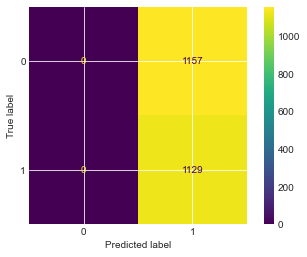

In [ ]:
#First of all , we will use ZeroR as a baseline model
#ZeroR is a simple model that predicts the majority class

from sklearn.metrics import ConfusionMatrixDisplay


zero_r = DummyClassifier(strategy='most_frequent', random_state=12)
zero_r.fit(X_train, y_train)
y_pred = zero_r.predict(X_test)
acc_zero_r = accuracy_score(y_test, y_pred)
f1_zero_r = cross_val_score(zero_r, X, y, cv=10, scoring='f1').mean()
print('Accuracy:', acc_zero_r)
print('F1 Score:', f1_zero_r)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
#confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()



Logistic Regression Accuracy: 0.9501312335958005
[[1102   55]
 [  59 1070]]
              precision    recall  f1-score   support

        -1.0       0.95      0.95      0.95      1157
         1.0       0.95      0.95      0.95      1129

    accuracy                           0.95      2286
   macro avg       0.95      0.95      0.95      2286
weighted avg       0.95      0.95      0.95      2286



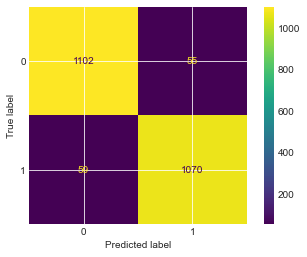

In [30]:
#logistic regression
#TODO : learning rate tuning
#hyperparameters for LR are:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = accuracy_score(y_test, y_pred)
print('Logistic Regression Accuracy:', acc_log)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()


Logistic Regression L1 Accuracy: 0.9514435695538058
Logistic Regression L2 Accuracy: 0.9501312335958005


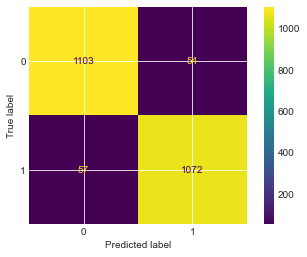

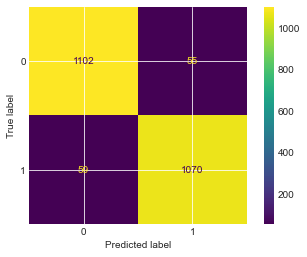

In [31]:
#trying out regularization for logistic regression
#L1 regularization
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
logreg_l1.fit(X_train, y_train)
y_pred = logreg_l1.predict(X_test)
acc_log_l1 = accuracy_score(y_test, y_pred)
print('Logistic Regression L1 Accuracy:', acc_log_l1)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

#L2 regularization
logreg_l2 = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)
logreg_l2.fit(X_train, y_train)
y_pred = logreg_l2.predict(X_test)
acc_log_l2 = accuracy_score(y_test, y_pred)
print('Logistic Regression L2 Accuracy:', acc_log_l2)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()



SVM Accuracy: 0.9667541557305337
[[1123   34]
 [  42 1087]]
              precision    recall  f1-score   support

        -1.0       0.96      0.97      0.97      1157
         1.0       0.97      0.96      0.97      1129

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286



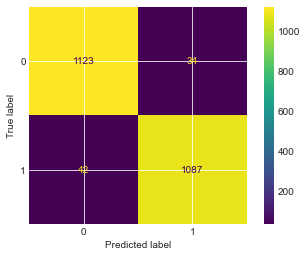

In [32]:
# Support Vector Machines 
#TODO : Hyperparameter tuning
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = accuracy_score(y_test, y_pred)
print('SVM Accuracy:', acc_svc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

Gaussian Naive Bayes Accuracy: 0.7462817147856518
[[1127   30]
 [ 550  579]]
              precision    recall  f1-score   support

        -1.0       0.67      0.97      0.80      1157
         1.0       0.95      0.51      0.67      1129

    accuracy                           0.75      2286
   macro avg       0.81      0.74      0.73      2286
weighted avg       0.81      0.75      0.73      2286



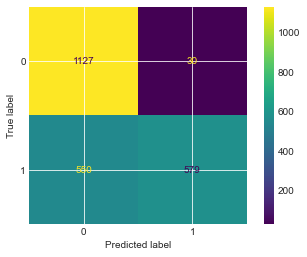

In [33]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = accuracy_score(y_test, y_pred)
print('Gaussian Naive Bayes Accuracy:', acc_gaussian)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()


Perceptron Accuracy: 0.9348206474190727
[[1100   57]
 [  92 1037]]
              precision    recall  f1-score   support

        -1.0       0.92      0.95      0.94      1157
         1.0       0.95      0.92      0.93      1129

    accuracy                           0.93      2286
   macro avg       0.94      0.93      0.93      2286
weighted avg       0.94      0.93      0.93      2286



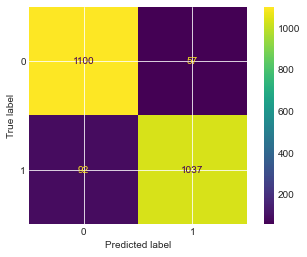

In [34]:
# Perceptron
#TODO : Hyperparameter tuning
perceptron = Perceptron(max_iter=1000, tol=1e-3)
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
acc_perceptron = accuracy_score(y_test, y_pred)
print('Perceptron Accuracy:', acc_perceptron)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

Linear SVC Accuracy: 0.9510061242344707
[[1103   54]
 [  58 1071]]
              precision    recall  f1-score   support

        -1.0       0.95      0.95      0.95      1157
         1.0       0.95      0.95      0.95      1129

    accuracy                           0.95      2286
   macro avg       0.95      0.95      0.95      2286
weighted avg       0.95      0.95      0.95      2286



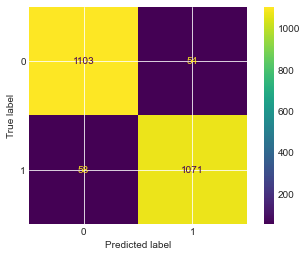

In [35]:
# Linear SVC
linear_svc = LinearSVC(max_iter=10000, dual=False)
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
acc_linear_svc = accuracy_score(y_test, y_pred)
print('Linear SVC Accuracy:', acc_linear_svc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()


SGD Accuracy: 0.9426946631671042
[[1085   72]
 [  59 1070]]
              precision    recall  f1-score   support

        -1.0       0.95      0.94      0.94      1157
         1.0       0.94      0.95      0.94      1129

    accuracy                           0.94      2286
   macro avg       0.94      0.94      0.94      2286
weighted avg       0.94      0.94      0.94      2286



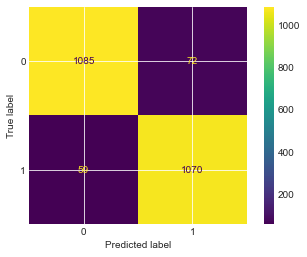

In [36]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
acc_sgd = accuracy_score(y_test, y_pred)
print('SGD Accuracy:', acc_sgd)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()


Decision Tree Accuracy: 0.9313210848643919
[[1081   76]
 [  81 1048]]
              precision    recall  f1-score   support

        -1.0       0.93      0.93      0.93      1157
         1.0       0.93      0.93      0.93      1129

    accuracy                           0.93      2286
   macro avg       0.93      0.93      0.93      2286
weighted avg       0.93      0.93      0.93      2286



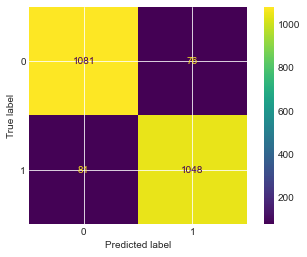

In [37]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = accuracy_score(y_test, y_pred)
print('Decision Tree Accuracy:', acc_decision_tree)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()


Random Forest Accuracy: 0.968066491688539
[[1128   29]
 [  44 1085]]
              precision    recall  f1-score   support

        -1.0       0.96      0.97      0.97      1157
         1.0       0.97      0.96      0.97      1129

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286



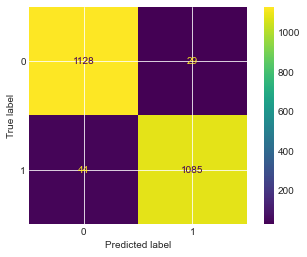

In [38]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
acc_random_forest = accuracy_score(y_test, y_pred)
print('Random Forest Accuracy:', acc_random_forest)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [44]:
#supress warnings
import warnings
warnings.filterwarnings('ignore')

#cross validation
models = [zero_r,logreg, svc, gaussian, perceptron, linear_svc, sgd, decision_tree, random_forest]
model_names = ['ZeroR','Logistic Regression', 'SVC', 'Gaussian Naive Bayes', 'Perceptron', 'Linear SVC', 'SGD', 'Decision Tree', 'Random Forest']
scores = []
for model, name in zip(models, model_names):
    scores.append(cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy').mean())
    print(f'{name} cross validation score: \t  {scores[-1]}')


ZeroR cross validation score: 	  0.5015310112278939
Logistic Regression cross validation score: 	  0.9401818703590774
SVC cross validation score: 	  0.9582250600853749
Gaussian Naive Bayes cross validation score: 	  0.7397182862814027
Perceptron cross validation score: 	  0.9108725233466061
Linear SVC cross validation score: 	  0.9396350635529886
SGD cross validation score: 	  0.9323070392557783
Decision Tree cross validation score: 	  0.9308836436249717
Random Forest cross validation score: 	  0.9643495832884934


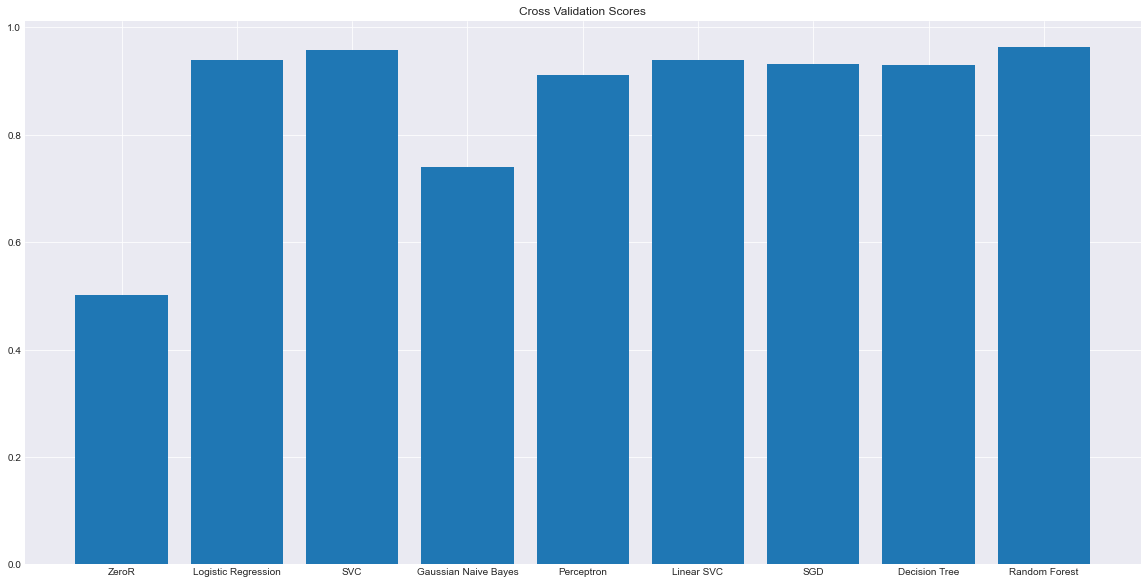

,Cross Validation Score
Random Forest,0.964350
SVC,0.958225
Logistic Regression,0.940182
Linear SVC,0.939635
SGD,0.932307
Decision Tree,0.930884
Perceptron,0.910873
Gaussian Naive Bayes,0.739718
ZeroR,0.501531


In [45]:
#plot the cross validation scores
plt.figure(figsize=(20,10))
plt.bar(model_names, scores)
plt.title('Cross Validation Scores')
plt.show()

#a table of the cross validation scores sorted in descending order
cross_val_scores = pd.DataFrame(scores, index=model_names, columns=['Cross Validation Score'])
cross_val_scores = cross_val_scores.sort_values(by='Cross Validation Score', ascending=False)
cross_val_scores

In [46]:
#model evaluation
models = [zero_r,logreg, svc, gaussian, perceptron, linear_svc, sgd, decision_tree, random_forest]

model_names = ['ZeroR','Logistic Regression', 'SVC', 'Gaussian Naive Bayes', 'Perceptron', 'Linear SVC', 'SGD', 'Decision Tree', 'Random Forest']
for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    print(f'{name} accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'{name} confusion matrix: \n{confusion_matrix(y_test, y_pred)}')
    print(f'{name} classification report: \n{classification_report(y_test, y_pred)}')
    print('\n\n')


ZeroR accuracy: 0.49387576552930884
ZeroR confusion matrix: 
[[   0 1157]
 [   0 1129]]
ZeroR classification report: 
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00      1157
         1.0       0.49      1.00      0.66      1129

    accuracy                           0.49      2286
   macro avg       0.25      0.50      0.33      2286
weighted avg       0.24      0.49      0.33      2286




Logistic Regression accuracy: 0.9501312335958005
Logistic Regression confusion matrix: 
[[1102   55]
 [  59 1070]]
Logistic Regression classification report: 
              precision    recall  f1-score   support

        -1.0       0.95      0.95      0.95      1157
         1.0       0.95      0.95      0.95      1129

    accuracy                           0.95      2286
   macro avg       0.95      0.95      0.95      2286
weighted avg       0.95      0.95      0.95      2286






SVC accuracy: 0.9667541557305337
SVC confusion matrix: 
[[1123   34]
 [  42 1087]]
SVC classification report: 
              precision    recall  f1-score   support

        -1.0       0.96      0.97      0.97      1157
         1.0       0.97      0.96      0.97      1129

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286




Gaussian Naive Bayes accuracy: 0.7462817147856518
Gaussian Naive Bayes confusion matrix: 
[[1127   30]
 [ 550  579]]
Gaussian Naive Bayes classification report: 
              precision    recall  f1-score   support

        -1.0       0.67      0.97      0.80      1157
         1.0       0.95      0.51      0.67      1129

    accuracy                           0.75      2286
   macro avg       0.81      0.74      0.73      2286
weighted avg       0.81      0.75      0.73      2286




Perceptron accuracy: 0.9348206474190727
Perceptron confusion matrix

In [47]:
#rank models
rank = pd.DataFrame({
    'Model': ['ZeroR','Logistic Regression', 'SVC', 'Gaussian Naive Bayes', 'Perceptron', 'Linear SVC', 'SGD', 'Decision Tree', 'Random Forest'],
    'Score': [acc_zero_r,acc_log, acc_svc, acc_gaussian, acc_perceptron, acc_linear_svc, acc_sgd, acc_decision_tree, acc_random_forest],
    'Cross Validation Score': scores,
    
})
rank = rank.sort_values(by='Score', ascending=False)
rank


,Model,Score
8,Random Forest,0.968066
2,SVC,0.966754
5,Linear SVC,0.951006
1,Logistic Regression,0.950131
6,SGD,0.942695
4,Perceptron,0.934821
7,Decision Tree,0.931321
3,Gaussian Naive Bayes,0.746282
0,ZeroR,0.493876


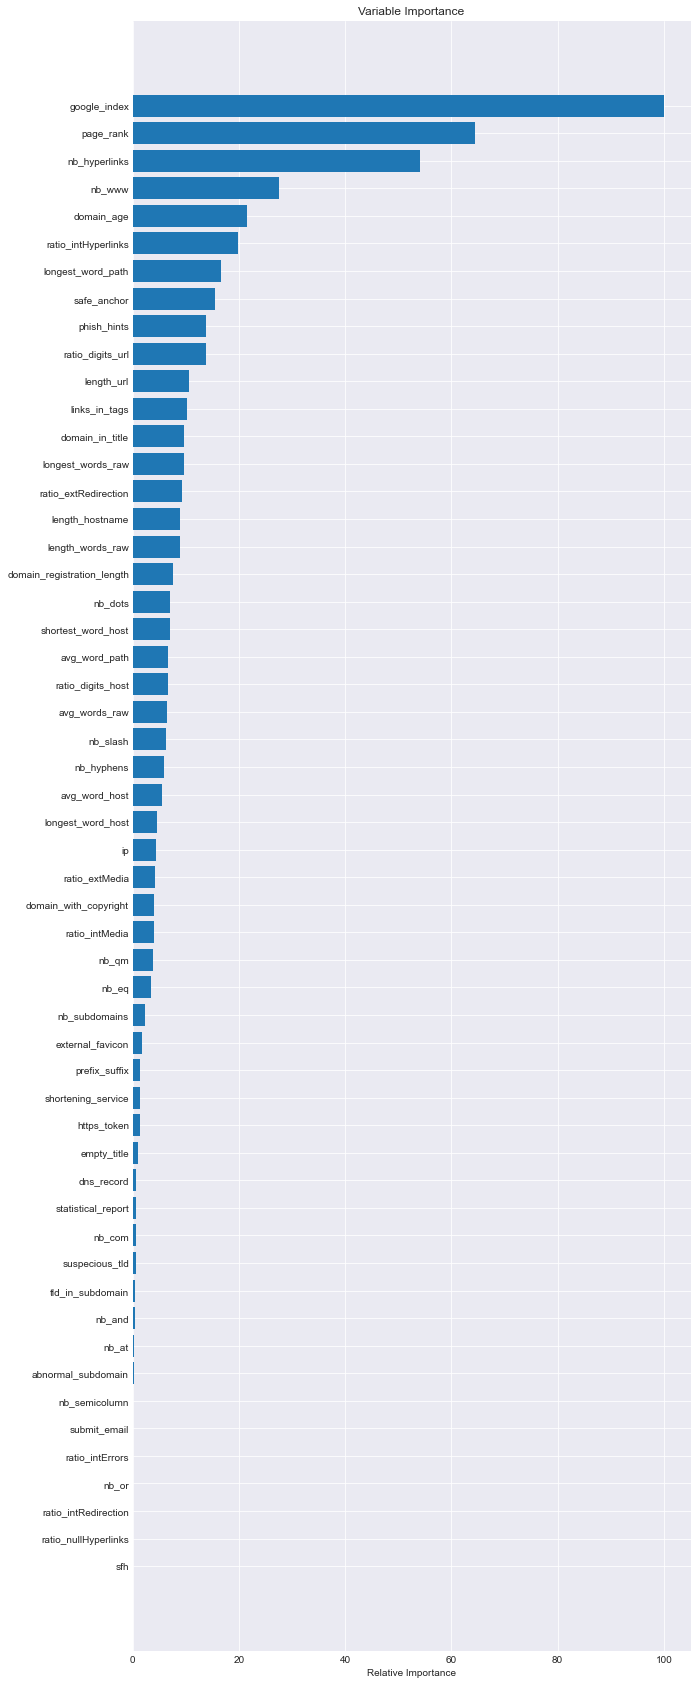

               feature  Relative importance
0     ratio_digits_url            13.783261
1          phish_hints            13.853856
2          safe_anchor            15.586665
3    longest_word_path            16.545877
4  ratio_intHyperlinks            19.819045
5           domain_age            21.621888
6               nb_www            27.573106
7        nb_hyperlinks            54.033689
8            page_rank            64.370021
9         google_index           100.000000


In [48]:
#random forest is the best model
#feature importance
feature_importance = random_forest.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
#87 features, large figure
plt.figure(figsize=(10,30))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

#print the most important features
important_features = X.columns[sorted_idx][-10:]
#dataframe of the most important features with their importance percentage
important_features_df = pd.DataFrame({'feature': important_features, 'Relative importance': feature_importance[sorted_idx][-10:]})
print(important_features_df)


In [49]:
#since the random forest model has the highest accuracy we will use it to make predictions
#and save the model
import joblib
joblib.dump(random_forest, 'phishing_model_random_forest_exp2.pkl')
#load the model
model = joblib.load('phishing_model_random_forest.pkl')
#make predictions
predictions = model.predict(X_test)
print(predictions)


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- brand_in_path
- brand_in_subdomain
- char_repeat
- domain_in_brand
- http_in_path
- ...


# Ensemble Learning

In [50]:
#using Ensemble Learning
from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators=[('zeroR',zero_r),('logreg', logreg), ('svc', svc), ('gaussian', gaussian), ('perceptron', perceptron), ('linear_svc', linear_svc), ('sgd', sgd), ('decision_tree', decision_tree), ('random_forest', random_forest)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')
#fit model to training data
ensemble.fit(X_train, y_train)
#test our model on the test data
ensemble.score(X_test, y_test)



0.9597550306211724

In [51]:
#Another Experiment on the best 5 classsifier in the voting classifier
#using Ensemble Learning
# from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators=[('logreg', logreg), ('svc', svc), ('linear_svc', linear_svc), ('sgd', sgd), ('random_forest', random_forest)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')
#fit model to training data
ensemble.fit(X_train, y_train)
#test our model on the test data
ensemble.score(X_test, y_test)



0.9531933508311461

##### So random forest accuracy is better than ensemble learning

###### Which is logical :)

In [52]:
#using bagging
from sklearn.ensemble import BaggingClassifier
#instantiate a BaggingClassifier
bagging = BaggingClassifier(RandomForestClassifier(), max_samples=0.5, max_features=0.5)
#fit to the training data
bagging.fit(X_train, y_train)
#test our model on the test data
bagging.score(X_test, y_test)


0.9545056867891514

In [53]:
#using boosting
from sklearn.ensemble import AdaBoostClassifier
#instantiate a AdaBoostClassifier
adaboost = AdaBoostClassifier(RandomForestClassifier(), n_estimators=5)
#fit to the training data
adaboost.fit(X_train, y_train)
#test our model on the test data
adaboost.score(X_test, y_test)


0.9676290463692039

Now We want to find the best hyperparameters for the random forest model.


In [54]:
#Random Forest hyperparameter tuning
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
#best parameters
print(f'Best parameters: {grid_search.best_params_}')
#best estimator
print(f'Best estimator: {grid_search.best_estimator_}')
#best score
print(f'Best score: {grid_search.best_score_}')

#save the best model
joblib.dump(grid_search.best_estimator_, 'best_model.pkl')

Fitting 3 folds for each of 288 candidates, totalling 864 fits


KeyboardInterrupt: 